# 统计基本概念

均值、中位数、众数、方差、标准差
百分位和矩

In [1]:
"""构造数据"""
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
np.mean(incomes) # 求均值

27120.529108050825

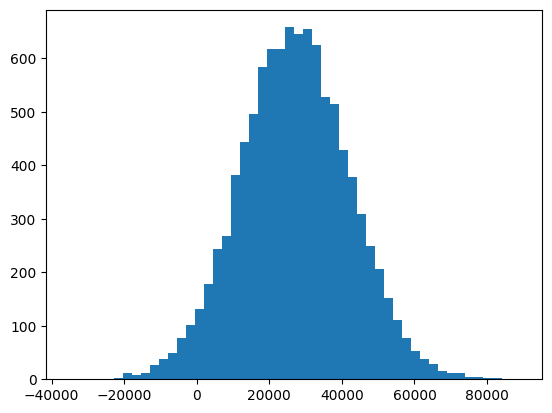

In [2]:
"""可视化"""
import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

In [3]:
"""计算中位数"""
np.median(incomes)

27039.09275712222

In [4]:
"""分析离群点"""
incomes = np.append(incomes, [1000000000])

np.mean(incomes), np.median(incomes)

(127107.8183262182, 27042.160204427026)

In [5]:
"""计算众数"""
ages = np.random.randint(18, high=90, size=500)

from scipy import stats
stats.mode(ages)

ModeResult(mode=67, count=13)

In [6]:
"""标准差和方差"""
np.std(incomes), np.var(incomes)

(9998740.270761661, 99974807002150.98)

## 百分位和矩

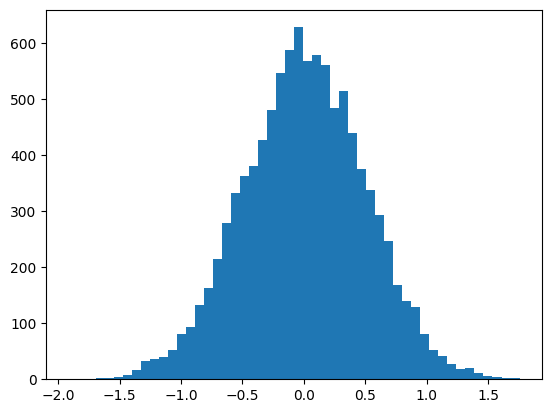

In [7]:
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(0, 0.5, 10000)

plt.hist(vals, 50)
plt.show()

In [8]:
"""第50百分位 - 即中位数"""
np.percentile(vals, 50), np.median(vals)

(0.006063076756917026, 0.006063076756917026)

In [9]:
np.percentile(vals, 90)

0.6413067905095479

## 矩

- 一阶矩：均值
- 二阶矩：方差
- 三阶矩：偏度
- 四阶矩：峰度

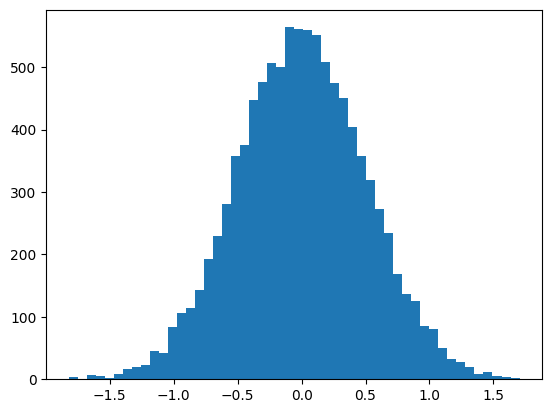

In [10]:
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(0, 0.5, 10000)

plt.hist(vals, 50)
plt.show()

In [11]:
import scipy.stats as sp
np.mean(vals), np.var(vals), sp.skew(vals), sp.kurtosis(vals)

(-0.000766870358229415,
 0.2511215106666188,
 -0.0029066812418236587,
 -0.028067247432201903)

# 数据分布

均匀分布 - np.random.uniform
正态分布/高斯分布 - scipy.stats.norm.pdf / np.random.normal
指数概率分布 - scipy.stats.expon.pdf
二项式概率质量函数 - scipy.stats.binom
泊松概率质量函数 - scipy.stats.poisson

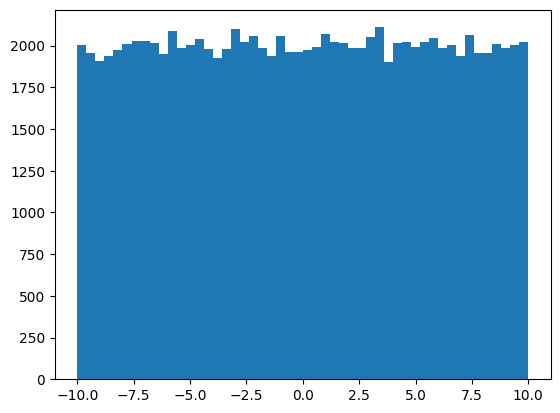

In [12]:
"""均匀分布随机数"""
import numpy as np
import matplotlib.pyplot as plt

values = np.random.uniform(-10.0, 10.0, 100000)
plt.hist(values, 50)
plt.show()

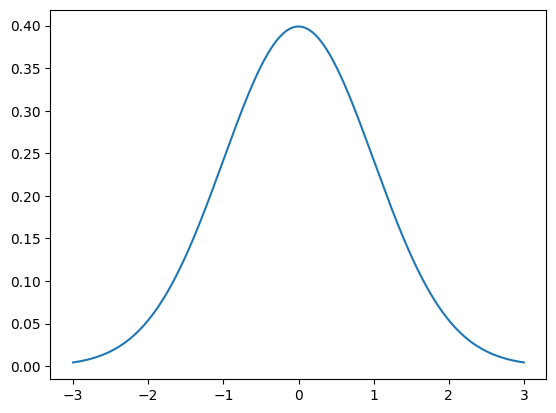

In [13]:
"""正态分布曲线 & 正态分布随机数"""
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x))

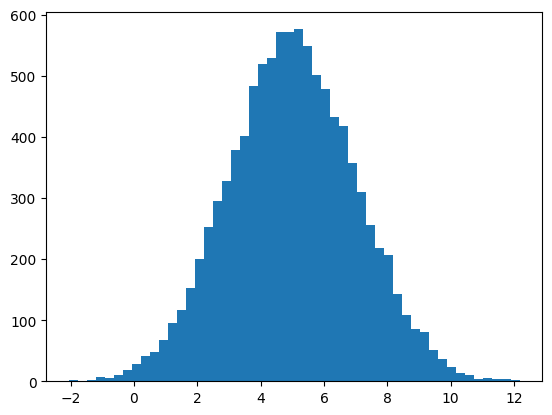

In [14]:
import numpy as np
import matplotlib.pyplot as plt

mu = 5.0
sigma = 2.0
values = np.random.normal(mu, sigma, 10000)
plt.hist(values, 50)
plt.show()

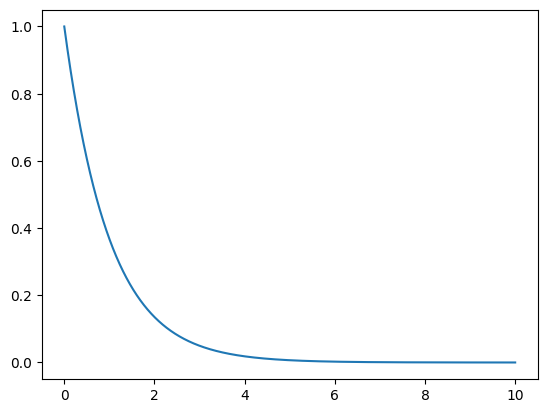

In [15]:
"""指数概率分布"""
from scipy.stats import expon
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.001)
plt.plot(x, expon.pdf(x))

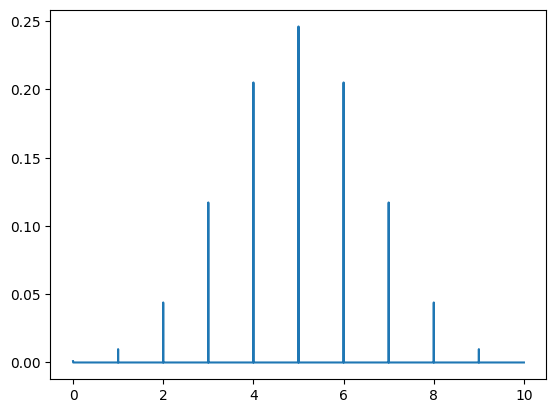

In [16]:
"""二项式概率质量函数"""
from scipy.stats import binom
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.001)
plt.plot(x, binom.pmf(x, n=10, p=0.5))

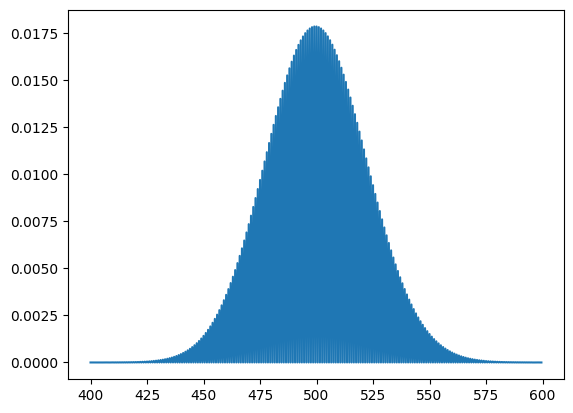

In [17]:
"""泊松概率质量函数"""
from scipy.stats import poisson
import matplotlib.pyplot as plt

mu = 500
x = np.arange(400, 600, 0.5)
plt.plot(x, poisson.pmf(x, mu))

# 相关性分析 - 协方差和相关系数

协方差和相关系数用于衡量两个变量之间的相关性，可用于特征选择阶段，筛选出与标签相关性较强的特征。
相关性并不能标识因果关系：两个变量相关，不能说一个变量是导致另一个变量变化的原因

## 自定义实现计算

主要是为了理解数学原理，后面有封装好的API直接调用

In [18]:
"""实现协方差的计算
"""
import numpy as np
from pylab import *

def de_mean(x):
    """计算向量与均值的差
    """
    xmean = np.mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    """计算协方差
    1. 两个向量分别计算与均值的差
    2. 两个向量计算点积
    3. 除以向量的大小-1（样本数据需要-1）
    """
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

-0.5132550554299582

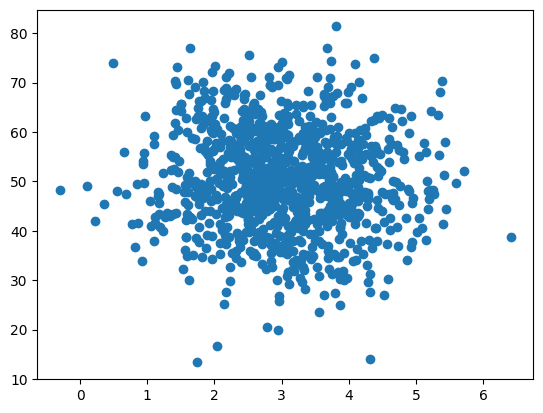

In [19]:
"""测试：构造随机数据，验证协方差表现性
两个特征是随机生成的，没有相关性，从散点图可以看出来
计算出来的协方差也比较小
"""
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)

covariance(pageSpeeds, purchaseAmount)

-8.738504449635467

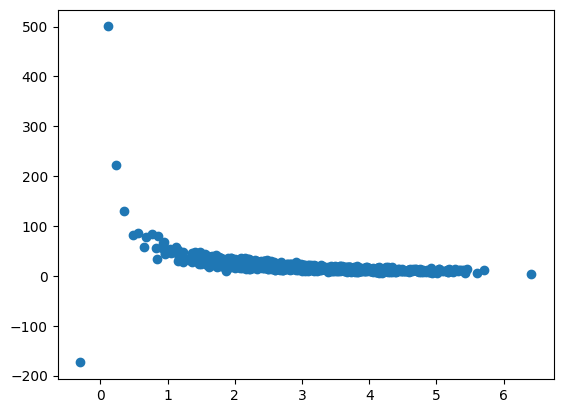

In [20]:
"""测试：构造相关数据，验证协方差的表现性
两个特征在生成样本数据时是相关的，从散点图可以看出来
计算出来的协方差也比较大
"""
purchaseAmount = np.random.normal(50, 10, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

covariance(pageSpeeds, purchaseAmount)

In [21]:
"""实现相关系数的计算
协方差的解释性较弱 - 多大算是相关？
相关系数对协方差进行了标准化（归一化），它给出了参考标准：1是完全正相关，-1是完全负相关，0是完全不相关。
相关系数的取值范围在[-1, 1]之间，计算逻辑是：协方差分别除以两个向量的标准差
"""
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x, y) / stddevx / stddevy

"""测试"""
correlation(pageSpeeds, purchaseAmount)

-0.438019527975097

## 基于第三方API的计算

In [22]:
"""计算相关系数
结果是一个矩阵，分别标识两个向量两两之间的相关系数（对角矩阵为1，标识两个向量分别与自身完全正相关）
"""
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.43758151],
       [-0.43758151,  1.        ]])

array([[ 1., -1.],
       [-1.,  1.]])

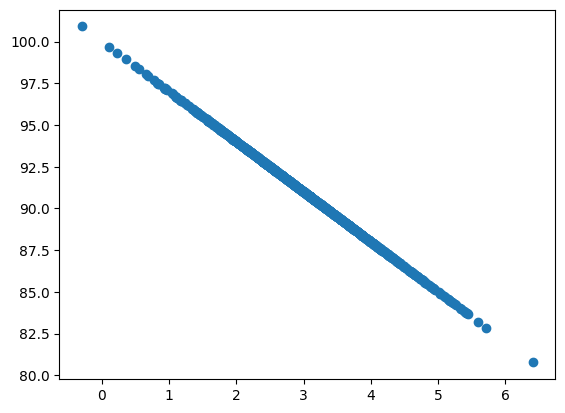

In [23]:
"""测试：完全正相关的表现"""
purchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, purchaseAmount)

np.corrcoef(pageSpeeds, purchaseAmount)

In [24]:
"""计算协方差
协方差的结果也是一个矩阵，对角线分别标识两个向量与自身的协方差
可以看到，协方差的解释性不好，比如对角线上的1和9都表示完全正相关（变量与其自身完全正相关）
"""
np.cov(pageSpeeds, purchaseAmount)

array([[ 0.96396145, -2.89188436],
       [-2.89188436,  8.67565309]])

# 条件概率

P(B|A) = P(A,B) / P(A)

## 贝叶斯定理

P(A|B) = P(A) * P(B|A) / P(B)